In [10]:
pkg load control
%plot gnuplot
%plot --format svg


In [11]:
function dx = f(x,t)
   dx(1) = x(2) - x(1);
   dx(2) = x(1)*(4-x(2));
end
xs = lsode(@f,[1,2],0:0.01:10);

In [22]:
function phasors(Z)
    figure
    hold on
     
    % Calculate a suitable axis limit based on phasors
    m = 1.2 * max([abs(real(Z)) abs(imag(Z))]);
     
    % Create a new figure window
    #figure
    #hold on
     
    % Plot phasors one at a time
    quiver(0*real(Z),0*imag(Z),real(Z),imag(Z));
     
    % Draw horizontal and vertical axis lines
    plot([-m m],[0 0])
    plot([0 0],[-m m])
     
    % Set axis limits and aspect ratio
    axis([-m,m,-m,m], 'square')
end

Current magnitude (A):
 0.0029972
Current phase angle (rad):
 1.2664


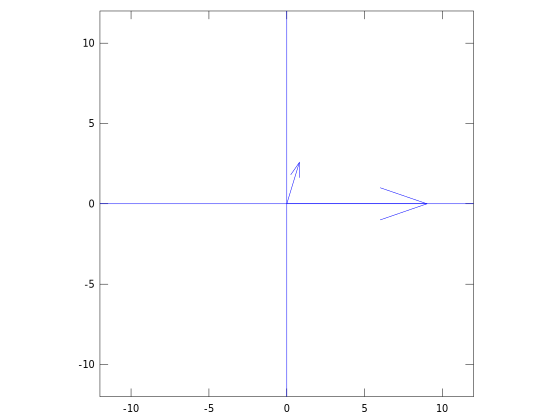

In [23]:
%plot gnuplot
%plot --format svg

% RCphasors.m - An RC circuit example
 
% create a variable j equal to sqrt(-1)
j = 0 + 1j;
 
% frequency in Hz and angular frequency in rad/s
f = 50;
w = 2*pi*f;
 
% supply voltage has magnitude 10V and zero phase angle
% i.e. at its maximum value at t=0
Vs = 10;
 
% Component values
R = 1e3;
C = 1e-6;
 
% impedance of capacitor
Zc = 1 / (j*w*C);
 
% total equivalent impedance of series R and C
Zeq = R + Zc;
 
% Calculate current
I = Vs / Zeq;
 
% Calculate capacitor and resistor voltages
Vc = I * Zc;
Vr = I * R;
 
% Display current magnitude and phase
disp 'Current magnitude (A):'
disp (abs(I))
disp 'Current phase angle (rad):'
disp (angle(I))
 
% Plot a phasor diagram (scale I to make it visible)
phasors([Vs 1000*I]);

In [25]:
clear;

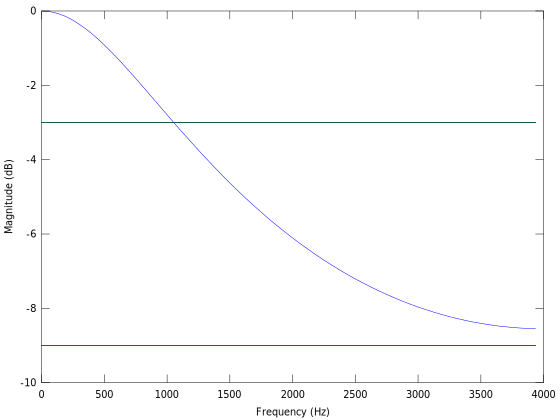

In [32]:
fs=8000;
a = [ 1 -0.455938 ];
b = [ 0.544062 ];
[H,f] = freqz(b, a, 64, fs);
cutoff = -3 * ones(64);
octaveup = -9 * ones(64);
figure();
plot(f, 20*log10(abs(H)), f, cutoff, f, octaveup);
xlabel("Frequency (Hz)");
ylabel("Magnitude (dB)");

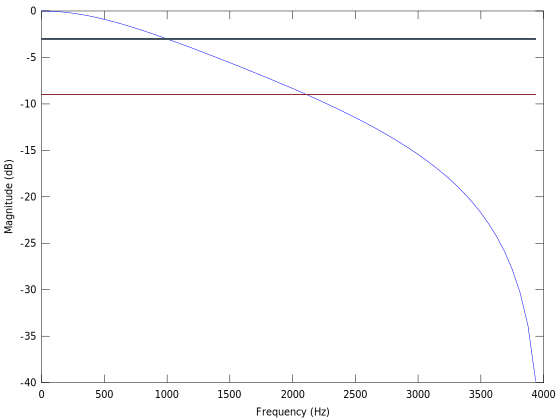

In [35]:
fs=8000;
a = [ 1 -0.414213 ];
b = [ -0.585786 -0.585786] / 2;
[H,f] = freqz(b, a, 64, fs);
cutoff = -3 * ones(64);
octaveup = -9 * ones(64);
figure(1);
plot(f, 20*log10(abs(H)), f, cutoff, f, octaveup);
xlabel("Frequency (Hz)");
ylabel("Magnitude (dB)");

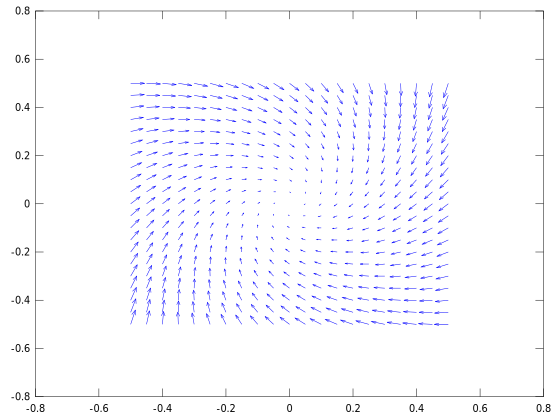

In [36]:
[x1, x2] = meshgrid(-.5:0.05:0.5, -.5:.05:.5);
x1dot = -x1 - 2 *x2 .*x1.^2+x2; %Note the use of .* and .^
x2dot = -x1-x2;
quiver(x1,x2,x1dot, x2dot)

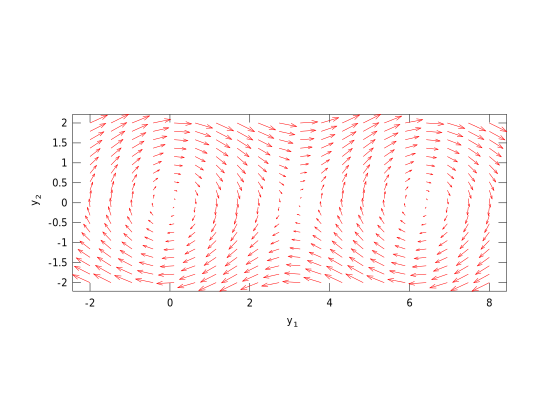

In [57]:
%plot gnuplot
%plot --format svg
pkg load control
f = @(t,Y) [Y(2); -sin(Y(1))];
y1 = linspace(-2,8,20);
y2 = linspace(-2,2,20);
[x,y] = meshgrid(y1,y2);
size(x);
size(y);
u = zeros(size(x));
v = zeros(size(x));
t=0;
for i = 1:numel(x)
    Yprime = f(t,[x(i); y(i)]);
    u(i) = Yprime(1);
    v(i) = Yprime(2);
end
figure();
quiver(x,y,u,v,'r'); 
xlabel('y_1');
ylabel('y_2');
axis tight equal;
#hold on
#for y20 = [0 0.5 1 1.5 2 2.5]
#    [ts,ys] = lsode("f",0,0.5,2.5);
 #   plot(ys(:,1),ys(:,2))
 #   plot(ys(1,1),ys(1,2),'bo') % starting point
 #   plot(ys(end,1),ys(end,2),'ks') % ending point
#end
#hold off



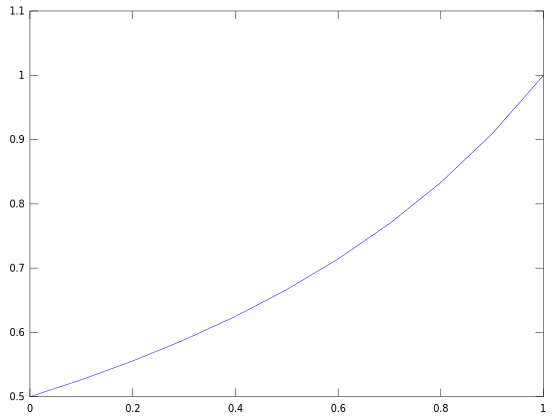

In [52]:
# Define the right-hand side of the equation:
function ret=f(x,t); ret=x^2; end;
# t will be on the interval [0,1]; x(0)=0.5
# t will be the set of moments of time:
t=(0:0.1:1)';
# x will be the values of the function at these moments of time.
x=lsode('f',0.5,t);
plot(t,x)

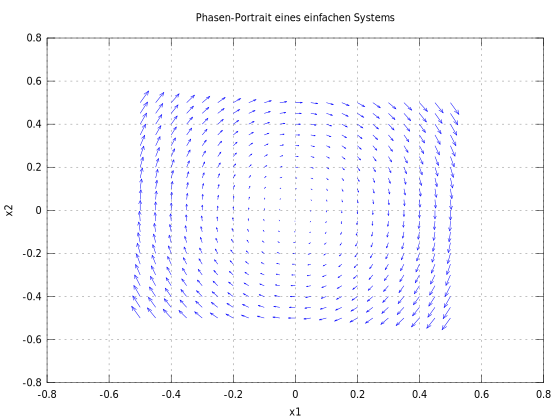

In [62]:
[x1, x2] = meshgrid(-.5:.05:.5, -.5:.05:.5);
x1dot = 2 * x2 .* (1 + x1.^2 + x2.^2);
x2dot = -4 * x1 .* (1 + x1.^2 + x2.^2);

% plot vector field
quiver(x1, x2, x1dot, x2dot)
grid
xlabel('x1');
ylabel('x2');

% some output
title("Phasen-Portrait eines einfachen Systems")
print("phaseportrait.pdf", "-color", "-dpdf")



timer =  0.24000


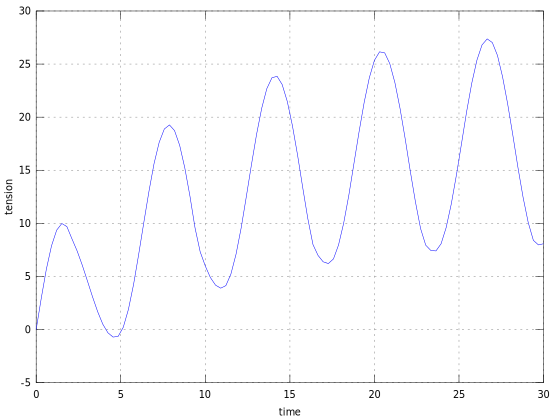

In [67]:
Tend = 30; u0 = [0;0];
function curr = Diode(u)
  Rd = 10; us = 0.7;
  if (u>=-us)  curr=0;
  else curr=Rd*(u+us);
  endif
endfunction
function y = circuit(u,t)
  C1 = 1; C2 = 1;
  y  = [-1/C1*(Diode(u(1)-10*sin(t))-Diode(u(2)-u(1)));
        10*cos(t)-1/C2*Diode(u(2)-u(1))];
endfunction
t = linspace(0,Tend,100);
lsode_options("absolute tolerance",1e-5);
lsode_options("relative tolerance",1e-5);
t0 = cputime();
u = lsode('circuit',u0,t);
timer = cputime()-t0
plot(t,u(:,2))
grid on; xlabel('time'); ylabel('tension');

error: 'rk45' undefined near line 1 column 8
timer =  0.012000
error: 'ode_Runge' undefined near line 1 column 14
timer =  0.0080000
error: 'uFix' undefined near line 1 column 11
error: evaluating argument list element number 2
    legend at line 378 column 9
error: legend: subscript indices must be either positive integers less than 2^31 or logicals
error: called from
    legend at line 420 column 15


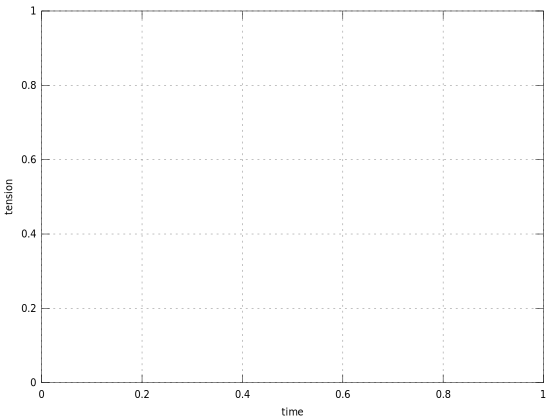

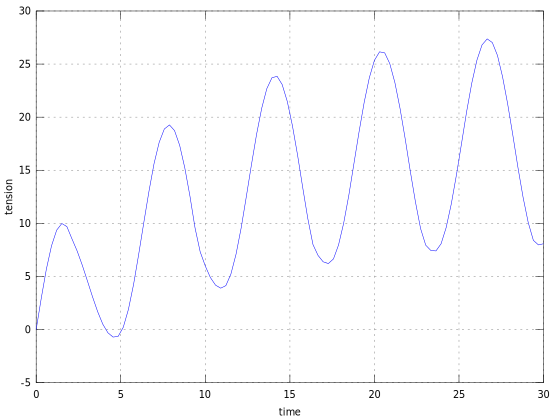

In [71]:
Tend = 30; u0 = [0;0];
function curr = Diode(u)
  Rd = 10; us = 0.7;
  if (u>=-us)  curr = 0;
  else curr = Rd*(u+us);
  endif
endfunction
function y = circuit(t,u)
  C1 = 1; C2 = 1;
  y  = [-1/C1*(Diode(u(1)-10*sin(t))-Diode(u(2)-u(1)));
        10*cos(t)-1/C2*Diode(u(2)-u(1))];
endfunction
t0 = cputime();
[t,u] = rk45('circuit',0,Tend,u0,1e-5,1e-5); % Runge Kutta adaptiv
timer = cputime()-t0
figure(1);
plot(t,u(:,2)'.')
grid on; xlabel('time'); ylabel('tension');
tFix = linspace(0,Tend,100);
t0 = cputime();
[tFix,uFix] = ode_Runge('circuit',tFix,u0,1); % Runge Kutta
timer = cputime()-t0
figure(2);
plot(tFix,uFix(:,2),t,u(:,2))
grid on; xlabel('time'); ylabel('tension');
legend('u fix','u adapt')

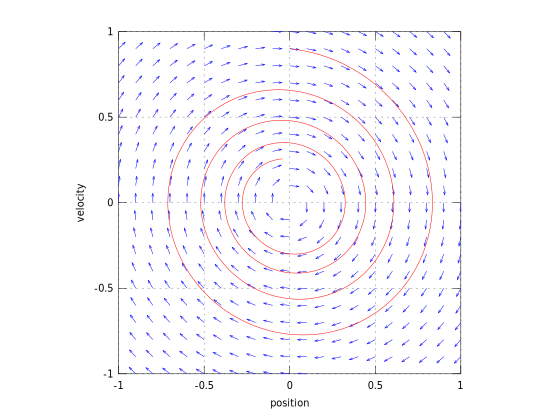

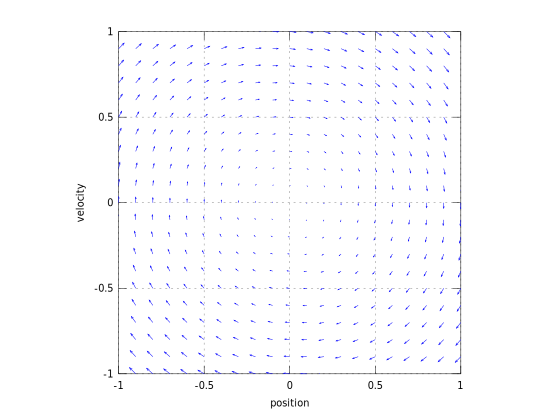

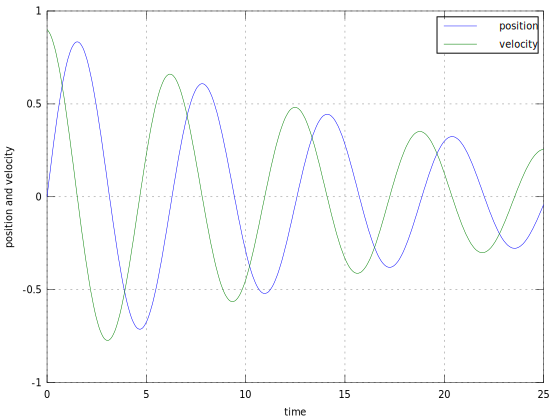

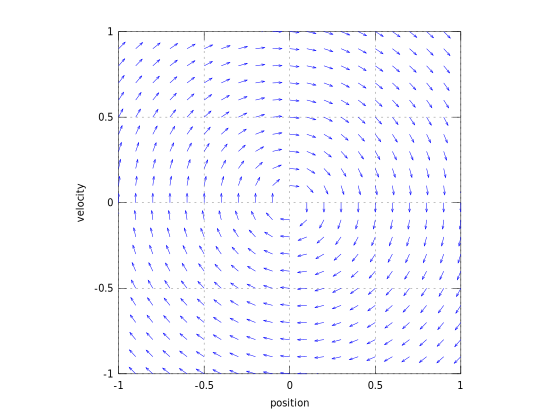

In [72]:
y = -1:0.1:1; %% choose the y values
v = -1:0.1:1; %% choose the v-values

%% define the function
function dy = F1(y,v)
  dy = v;
endfunction

function dv = F2(y,v)
  k = 1;  alpha = 0.1;
  dv = -k*y-alpha*v;
endfunction

%% create the zero vector field
ny = length(y);    nv = length(v);
V1 = zeros(ny,nv); V2 = zeros(ny,nv);

%% compute the vector field
for i = 1:ny
  for j = 1:nv
    V1(i,j) = F1(y(i),v(j));  V2(i,j) = F2(y(i),v(j));
  endfor
endfor

%% choose the scale factor
scalefactor = 0.4;

figure(1);
quiver(y,v,V1',V2',scalefactor)
grid on
axis('equal')
axis([min(y),max(y),min(v),max(v)])
xlabel('position'); ylabel('velocity');

figure(2);
Vlength = sqrt(V1.^2+V2.^2);
V1n = V1./Vlength; V2n = V2./Vlength;
quiver(y,v,V1n',V2n',scalefactor)
xlabel('position'); ylabel('velocity');
grid on
axis('equal')
axis([min(y),max(y),min(v),max(v)])


function dy = ODEPend(y,t)
  k = 1;  alpha = 0.1;
  dy = [y(2); -k*y(1)-alpha*y(2)];
endfunction

T  = 0:0.05:25;
YV = lsode('ODEPend',[0;0.9],T);

figure(3);
plot(T,YV(:,1),';position;',T,YV(:,2),';velocity;');
grid on
xlabel('time'); ylabel('position and velocity');

figure(4)
hold on
quiver(y,v,V1n',V2n',scalefactor)
grid on
axis('equal')
axis([min(y),max(y),min(v),max(v)])
plot(YV(:,1),YV(:,2),'r')
xlabel('position'); ylabel('velocity');
hold off